In [0]:
# Dataset is hosted on my Dropbox
# https://www.dropbox.com/s/wu76tnt41przqhe/CovidDataset.zip

In [4]:
!wget https://www.dropbox.com/s/wu76tnt41przqhe/CovidDataset.zip

--2020-04-28 11:55:17--  https://www.dropbox.com/s/wu76tnt41przqhe/CovidDataset.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/wu76tnt41przqhe/CovidDataset.zip [following]
--2020-04-28 11:55:18--  https://www.dropbox.com/s/raw/wu76tnt41przqhe/CovidDataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca4f21797f2bf2d3a62f19f238a.dl.dropboxusercontent.com/cd/0/inline/A2ujA6rI0KPgVE42AGwUh8lzVjlDqVMpNWaUgzJxBYUVlyeVZcR9wRG75fuO85pEertnMuPKUYDwU5gOKhm47X2Ex2fwNB5GyquaaBycTJIqRR3KkzRwfXhdJ3jMIo8I688/file# [following]
--2020-04-28 11:55:18--  https://uca4f21797f2bf2d3a62f19f238a.dl.dropboxusercontent.com/cd/0/inline/A2ujA6rI0KPgVE42AGwUh8lzVjlDqVMpNWaUgzJxBYUVlyeVZcR9wRG75fuO85pEertnMuPKUYDwU5gOKhm47X2Ex2fwNB5Gyqu

In [5]:
!ls

CovidDataset.zip  sample_data


In [6]:
!unzip CovidDataset

Archive:  CovidDataset.zip
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-b

In [0]:
TRAIN_PATH = 'CovidDataset/Train'
VAL_PATH = 'CovidDataset/Val'

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import *
from keras.layers import *
from keras.preprocessing import image

In [9]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)       

In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

In [0]:
# Train from scratch
train_datagen = image.ImageDataGenerator (
    rescale = 1.0/255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

val_datagen = image.ImageDataGenerator (
    rescale = 1.0/255
)

In [13]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 224 images belonging to 2 classes.


In [14]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [15]:
val_generator = val_datagen.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


In [16]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs = 10,
    validation_data = val_generator,
    validation_steps = 2
)

Epoch 1/10
8/8 [==============================] - 14s 2s/step - loss: 1.2640 - acc: 0.4805 - val_loss: 0.6875 - val_acc: 0.5833
Epoch 2/10
8/8 [==============================] - 11s 1s/step - loss: 0.6594 - acc: 0.5898 - val_loss: 0.5957 - val_acc: 0.9167
Epoch 3/10
8/8 [==============================] - 11s 1s/step - loss: 0.4644 - acc: 0.7930 - val_loss: 0.2771 - val_acc: 0.9333
Epoch 4/10
8/8 [==============================] - 11s 1s/step - loss: 0.4637 - acc: 0.7656 - val_loss: 0.3733 - val_acc: 0.9500
Epoch 5/10
8/8 [==============================] - 11s 1s/step - loss: 0.3478 - acc: 0.8516 - val_loss: 0.2176 - val_acc: 0.9667
Epoch 6/10
8/8 [==============================] - 11s 1s/step - loss: 0.3286 - acc: 0.9023 - val_loss: 0.2340 - val_acc: 0.9167
Epoch 7/10
8/8 [==============================] - 11s 1s/step - loss: 0.2552 - acc: 0.8945 - val_loss: 0.1001 - val_acc: 0.9833
Epoch 8/10
8/8 [==============================] - 11s 1s/step - loss: 0.1462 - acc: 0.9531 - val_loss: 0

In [0]:
# -- TODO --
# Class Activation Maps
# Grad Cam

In [0]:
model.save('model_10.h5')

In [18]:
model.evaluate_generator(train_generator)

[0.10386522114276886, 0.96875]

In [19]:
model.evaluate_generator(val_generator)

[0.062139082700014114, 0.9666666388511658]

## Testing our Model

In [0]:
model = load_model('model_10.h5')

In [21]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [0]:
import os

In [0]:
y_actual = []
y_test = []

In [0]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
    img = image.load_img("./CovidDataset/Val/Normal/"+i, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    p = model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(1)

In [0]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
    img = image.load_img("./CovidDataset/Val/Covid/"+i, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    p = model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(0)

In [0]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

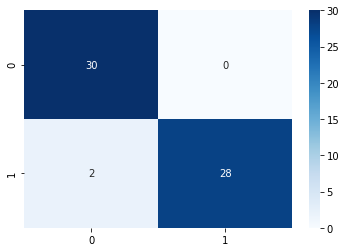

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_actual,y_test)

import matplotlib.pyplot as plt
import seaborn as sn
sn.heatmap(cm,cmap='Blues',annot=True)
plt.show()